#THE SPARKS FOUNDATION- Data Science & Business Analytics Internship
Author: Moumita Chakraborty
# Task 1

In [2]:
#importing required librabries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
url="http://bit.ly/w-data"
dataset= pd.read_csv(url)

In [4]:
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


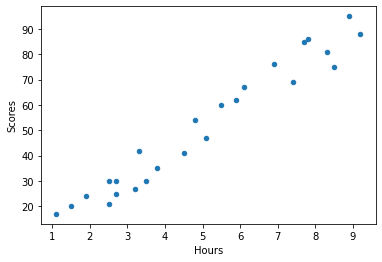

In [7]:
dataset.plot(kind="scatter",x='Hours', y='Scores')
plt.pyplot.show()

In [8]:
dataset.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


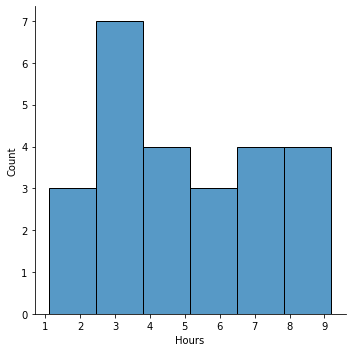

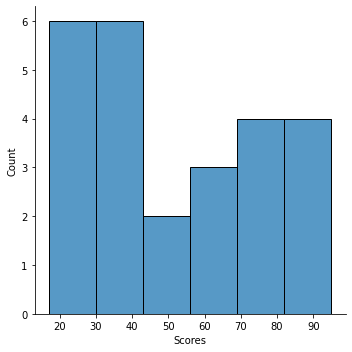

In [9]:
hours=dataset['Hours']
scores=dataset['Scores']
sns.displot(hours)
sns.displot(scores)

In [11]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=50)

In [13]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

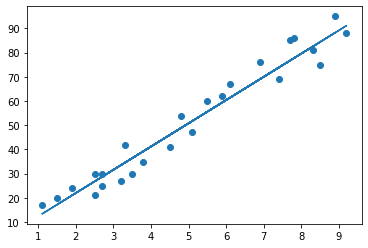

In [14]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.pyplot.scatter(x,y)
plt.pyplot.plot(x,line)
plt.pyplot.show()

In [15]:
y_pred=reg.predict(x_test)

In [16]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


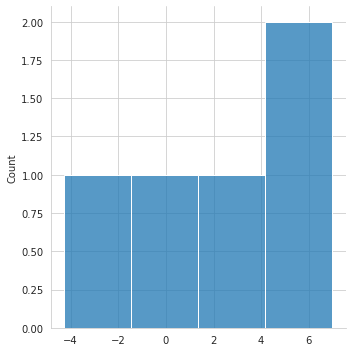

In [17]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.pyplot.show()

In [18]:
hour=9.25
s=reg.predict([[hour]])
print("If a student studies for {} hours per day he/she will score {} % in exam".format(hour,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam


In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:',r2_score(y_test, y_pred ))

Mean Absolute error: 4.5916495300630285
R2 score: 0.971014141329942
